# <center> DATA MINING PROJECT | FDC05 2023 <br > BANK CUSTOMERS' CHURN PREDICTION 

<strong>Giới thiệu:</strong> You will find some information about a dataset provided by a commercial
bank. Based on this dataset, you are required to use all your knowledge and skills that you have
gained throughout the module to address one of the business challenges given below


<strong>Bộ dataset bao gồm các dữ liệu về:</strong> 
- Demographic của khách hàng (giới tính, nơi sinh sống, tình trạng hôn nhân)
- Lịch sử giao dịch
- Thông tin dịch vụ khách hàng sử dụng
- Preferences

<strong>Thời gian quan sát:</strong> thời điểm 1 tuần, 1 tháng, 3 tháng trước ngày 31/12/2020

<strong>Thời gian dự đoán:</strong> tháng 3/tháng 6 năm 2021

<strong>Đặt vấn đề:</strong> 

- Lập hồ sơ khách hàng của một ngân hàng và dự đoán ai có khả năng rời bỏ (churn) dịch vụ.

<strong>Định nghĩa khách hàng "churn":</strong>
- Những khách hàng có ghi nhận giao dịch trong 3 tháng trước thời gian quan sát nhưng không có giao dịch trong tháng 3 và tháng 6. 
- Hoặc những khách hàng không có giao dịch trong tháng 6 nhưng có giao dịch trong tháng 3, và balance tháng 6 bằng 0

<strong>Câu hỏi đặt ra là:<strong>  Với đặc trưng của bộ dữ liệu, như thế nào gọi là có giao dịch?

- Sau khi dán nhãn, tìm ra đặc điểm của nhóm khách hàng churn và không churn (demographic, behaviour dựa trên dữ liệu payment và transaction)
- Lập model dự đoán khả năng churn

<strong>Mô tả quá trình thực hiện:</strong>
<br> Part 1. Data cleaning
<br> Part 2. EDA
<br> Phần 3. Model development

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, classification_report
from sklearn.linear_model import Ridge, Lasso
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline

# <span style="color: blue"> Part 1: Data Cleaning

## 1. Load dữ liệu

In [168]:
data = pd.read_csv('dataset.csv')
data.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
data.columns

Index(['local_ref_1', 'vn_marital_status', 'resid_province', 'resid_district',
       'resid_wards', 'birth_incorp_date', ' amount_week ', 'max_amount_week',
       'min_amount_week', 'distinct_payment_code_week',
       'count_payment_code_week', 'distinct_trans_group_week',
       'distinct_ref_no_week', 'amount_month', 'max_amount_month',
       'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'most_act_mar2021',
       'total_act_mar2021', ' total_amt_mar2021 ', 'most_act_juin2021_count',
       'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021',
       'rd_id', 'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo',
       'totalLoginMar2021_heoSo', 

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   local_ref_1                   97266 non-null   object 
 1   vn_marital_status             96971 non-null   object 
 2   resid_province                93431 non-null   float64
 3   resid_district                93435 non-null   float64
 4   resid_wards                   93433 non-null   float64
 5   birth_incorp_date             99990 non-null   float64
 6    amount_week                  54800 non-null   float64
 7   max_amount_week               54800 non-null   float64
 8   min_amount_week               54800 non-null   float64
 9   distinct_payment_code_week    56850 non-null   float64
 10  count_payment_code_week       56850 non-null   float64
 11  distinct_trans_group_week     56850 non-null   float64
 12  distinct_ref_no_week          56850 non-null 

In [171]:
data.shape
# bộ dữ liệu khá lớn gồm 100 000 hàng, 50 cột (biến)

(100000, 50)

Các dữ liệu về HeoSo không nằm trong phạm vi của project này nên sẽ được xóa đi:

In [172]:
columns_to_drop = ['savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo', 'totalLoginMar2021_heoSo', 'totalLoginJuin2021_heoSo', 'totalSavings2021_heoSo']
data.drop(columns_to_drop, axis=1, inplace=True)

- Thêm cột số tuổi:

In [173]:
# Tính năm hiện tại
current_year = 2023

# Tính tuổi từ năm sinh và thêm cột 'age' vào DataFrame
data['age'] = current_year - data['birth_incorp_date']

## 2. Gán nhãn churn

Lọc ra những khách hàng không có giao dịch trong tháng 3 (dữ liệu trống trong tháng 3) --> không có giao dịch trong tháng 6 (dữ liệu trống trong tháng 6). Thêm cột churn, gán nhãn cho những khách hàng vừa lọc là churn (1), còn lại là không churn (0). Chuyển type cột thành categorical.

In [174]:
# Kiểm tra và lọc ra những khách hàng không có giao dịch trong tháng 3 và tháng 6
no_transaction_mar = data[data['total_act_mar2021'].isnull()]
no_transaction_juin = data[data['total_act_juin2021'].isnull()]

no_transaction_both = no_transaction_mar[no_transaction_mar['rd_id'].isin(no_transaction_juin['rd_id'])]

# Thêm cột 'churn' và gán nhãn cho các khách hàng vừa lọc
data['churn'] = 0  # Khởi tạo cột churn với giá trị mặc định là 0
data.loc[data['rd_id'].isin(no_transaction_both['rd_id']), 'churn'] = 1

# Chuyển type của cột 'churn' thành categorical
data['churn'] = data['churn'].astype('category')

Lọc ra những khách hàng không có giao dịch trong tháng 6 nhưng có giao dịch trong tháng 3, và balance tháng 6 bằng 0

In [175]:
# Lọc ra những khách hàng không có giao dịch trong tháng 6 nhưng có giao dịch trong tháng 3
no_transaction_juin = data[data['total_act_juin2021'].isnull()]
have_transaction_mar = data[~data['total_act_mar2021'].isnull()]

# Lọc ra những người có balance tháng 6 bằng 0
balance_zero_juin = data[data['balanceJuin2021'] == 0]

# Gộp các điều kiện lại với nhau
churn_candidates = no_transaction_juin.merge(have_transaction_mar, on='rd_id').merge(balance_zero_juin, on='rd_id')

# Cập nhật nhãn 'churn' cho những người này thành 1
data.loc[data['rd_id'].isin(churn_candidates['rd_id']), 'churn'] = 1

In [176]:
# Chuyển đổi cột 'churn' sang dạng số (integer) để tính tổng
data['churn_int'] = data['churn'].astype(int)

# Đếm số lượng khách hàng có nhãn 'churn' là 1
churn_count = data['churn_int'].sum()

print("Số lượng churn là:", churn_count)

# Xóa cột phụ trợ churn_int
data.drop('churn_int', axis=1, inplace=True)

Số lượng churn là: 22565


Như vậy có 22.565% khách hàng trong tập dữ liệu là churn customer

In [177]:
data.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021,age,churn
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,0
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0,37.0,0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,0
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,1
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,0


## 3. Xử lý datatype

Nhìn qua datatype của các cột:

In [178]:
data.dtypes

local_ref_1                       object
vn_marital_status                 object
resid_province                   float64
resid_district                   float64
resid_wards                      float64
birth_incorp_date                float64
 amount_week                     float64
max_amount_week                  float64
min_amount_week                  float64
distinct_payment_code_week       float64
count_payment_code_week          float64
distinct_trans_group_week        float64
distinct_ref_no_week             float64
amount_month                     float64
max_amount_month                 float64
min_amount_month                 float64
distinct_payment_code_month      float64
count_payment_code_month         float64
distinct_trans_group_month       float64
distinct_ref_no_month            float64
amount_3month                    float64
max_amount_3month                float64
min_amount_3month                float64
distinct_payment_code_3month       int64
count_payment_co

Một số thay đổi về datatype:
- các dữ liệu về nơi sinh sống resid_province của khách hàng nên chuyển thành category
- các kiểu dữ liệu object nên chuyển thành category để python có thể đọc hiểu
- tuổi là số nguyên nên chuyển thành int64 thay vì float
- các dữ liệu về loại dịch vụ (distinct_payment_code), nhóm giao dịch (distinct_trans_group) nên chuyển thành category thay vì float
- các dữ liệu về số lượng giao dịch, số lượng người nhận, đối tác nên chuyển thành dạng số nguyên int64
- các dữ liệu về nhóm nợ chuyển thành category

In [179]:
# chuyển thành category:
data[['local_ref_1', 'vn_marital_status', 'most_act_mar2021', 'most_act_juin2021', 'distinct_payment_code_week', 'distinct_payment_code_month', 'distinct_payment_code_3month', 'distinct_trans_group_week', 'distinct_trans_group_month', 'distinct_trans_group_3month', 'nhomno_xhtdJuin2021']] =  data[['local_ref_1', 'vn_marital_status', 'most_act_mar2021', 'most_act_juin2021', 'distinct_payment_code_week', 'distinct_payment_code_month', 'distinct_payment_code_3month', 'distinct_trans_group_week', 'distinct_trans_group_month', 'distinct_trans_group_3month', 'nhomno_xhtdJuin2021']].astype('category', errors='ignore')

In [180]:
# chuyển thành int:
data[['birth_incorp_date', 'age', 'most_act_mar2021_count', 'most_act_juin2021_count', 'distinct_ref_no_week', 'distinct_ref_no_month', 'distinct_ref_no_3month', 'count_payment_code_week', 'count_payment_code_month', 'count_payment_code_3month']] = data[['birth_incorp_date', 'age', 'most_act_mar2021_count', 'most_act_juin2021_count', 'distinct_ref_no_week', 'distinct_ref_no_month', 'distinct_ref_no_3month', 'count_payment_code_week', 'count_payment_code_month', 'count_payment_code_3month']].astype('int64' , errors='ignore') 

In [181]:
data.dtypes

local_ref_1                     category
vn_marital_status               category
resid_province                   float64
resid_district                   float64
resid_wards                      float64
birth_incorp_date                float64
 amount_week                     float64
max_amount_week                  float64
min_amount_week                  float64
distinct_payment_code_week      category
count_payment_code_week          float64
distinct_trans_group_week       category
distinct_ref_no_week             float64
amount_month                     float64
max_amount_month                 float64
min_amount_month                 float64
distinct_payment_code_month     category
count_payment_code_month         float64
distinct_trans_group_month      category
distinct_ref_no_month            float64
amount_3month                    float64
max_amount_3month                float64
min_amount_3month                float64
distinct_payment_code_3month    category
count_payment_co

## 4. Xử lý missing values

In [182]:
# Đếm missing values
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
sub_productJuin2021,79250,79.250
categoryJuin2021,70044,70.044
balanceJuin2021,70044,70.044
product_codeJuin2021,70044,70.044
sectorJuin2021,70044,70.044
loaikyhanJuin2021,70044,70.044
nominal_interestJuin2021,70044,70.044
real_interestJuin2021,70044,70.044
nhomno_xhtdJuin2021,70044,70.044
amount_week,45200,45.200


Fill dữ liệu trống của cột nhóm  nợ bằng 0 (giả định rằng, ko có dữ liệu đồng nghĩa với không tham gia dịch vụ vay nợ)

In [183]:
data['nhomno_xhtdJuin2021'] = data['nhomno_xhtdJuin2021'].cat.add_categories([0])
data['nhomno_xhtdJuin2021'].fillna(0, inplace=True)

Drop các cột 'balanceJuin2021', 'nominal_interestJuin2021', 'real_interestJuin2021', 'categoryJuin2021', 'sub_productJuin2021', 'loaikyhanJuin2021', 'sectorJuin2021', 'product_codeJuin2021'

In [184]:
columns_to_drop_2 = ['balanceJuin2021', 'nominal_interestJuin2021', 'real_interestJuin2021', 'categoryJuin2021', 'sub_productJuin2021', 'loaikyhanJuin2021', 'sectorJuin2021', 'product_codeJuin2021']
data.drop(columns_to_drop_2, axis=1, inplace=True)

- Thay thế số liệu thiếu của số tiền giao dịch - amount, max, min (tuần, tháng, 3 tháng) bằng 0:

In [185]:
columns_to_fill = ['max_amount_week', 'min_amount_week', 'amount_month', 'max_amount_month', 'min_amount_month', 'amount_3month', 'max_amount_3month', 'min_amount_3month']
for column in columns_to_fill:
    data[column].fillna(0, inplace=True)

- Thay thế số liệu thiếu của loại giao dịch (distinct_payment_code) khách hàng sử dụng bằng 0 => số lượng dịch vụ count_payment_code cũng đc thay thế bằng 0.
- Tương tự, mặc định rằng missing values về nhóm giao dịch khách hàng sử dụng (distinct_trans_group) là ko có giao dịch => điền 0
- Dữ liệu trống về số lượng người nhận/đối tác (distint_ref_no) cũng sẽ được fill bằng 0

In [186]:
columns_to_fill_with_zero = [
    'distinct_payment_code_week', 'count_payment_code_week', 'distinct_trans_group_week', 'distinct_ref_no_week',
    'distinct_payment_code_month', 'count_payment_code_month', 'distinct_trans_group_month', 'distinct_ref_no_month',
    'distinct_payment_code_3month', 'count_payment_code_3month', 'distinct_trans_group_3month', 'distinct_ref_no_3month'
]

for column in columns_to_fill_with_zero:
    if pd.api.types.is_categorical_dtype(data[column]):
        if 0 not in data[column].cat.categories:
            data[column] = data[column].cat.add_categories([0])
        data[column].fillna(0, inplace=True)
    else:
        data[column].fillna(0, inplace=True)

- Những khách hàng chỉ sd giao dịch phi tài chính (total_act = 1, most_act = 'GIAO DICH PHI TAI CHINH') sẽ có total_amt = 0 vì không xác định được tổng giá trị của giao dịch phi tài chính. Vì vậy ta sẽ lọc điều kiện này và fill các giá trị thiếu của total_amt bằng 0:

In [187]:
condition_1 = (data['total_act_mar2021'] == 1) & (data['most_act_mar2021'] == 'GIAO DICH PHI TAI CHINH')
data.loc[condition_1, ' total_amt_mar2021 '] = data.loc[condition_1, ' total_amt_mar2021 '].fillna(0)

condition_2 = (data['total_act_juin2021'] == 1) & (data['most_act_juin2021'] == 'GIAO DICH PHI TAI CHINH')
data.loc[condition_2, 'total_amt_juin2021'] = data.loc[condition_2, 'total_amt_juin2021'].fillna(0)

- Điền 0 vào các missing values của loại giao dịch thực hiện nhiều nhất (most_act) --> count của nó cũng bằng 0 (most_act_..._count) --> tổng tất cả các loại giao dịch cũng có cùng số lượng missing values, điền 0 --> tương tự với tổng giá trị giao dịch

(Chỉ có 2 khách hàng bị thiếu loại giao dịch thực hiện nhiều nhất mà lại có số lượng giao dịch thực hiện nhiều nhất, không ảnh hưởng)

In [188]:
transaction = ['most_act_mar2021_count', 'most_act_juin2021_count', 
               'total_act_mar2021', 'total_act_juin2021', 
               'total_amt_juin2021', ' total_amt_mar2021 ']

for column in transaction:
    data[column].fillna(0, inplace=True)

In [189]:
columns = ['most_act_mar2021', 'most_act_juin2021']
for col in columns:
    data[col] = data[col].cat.add_categories([0])
    data[col].fillna(0, inplace=True)

- Các số liệu về năm sinh chỉ thiếu 10, có thể thay bằng giá trị phổ biến nhất: 

In [190]:
# Tìm giá trị phổ biến nhất (mode) của cột năm sinh
mode_birth_year = data['birth_incorp_date'].mode()[0]

# Điền các giá trị thiếu trong cột năm sinh bằng giá trị mode
data['birth_incorp_date'].fillna(mode_birth_year, inplace=True)

In [191]:
# Tìm giá trị phổ biến nhất trong cột 'year_of_birth'
most_common_age = data['age'].mode()[0]

# Điền giá trị thiếu trong cột 'year_of_birth' bằng giá trị phổ biến nhất
data['age'].fillna(most_common_age, inplace=True)

- Chỉ cần dữ liệu về province, các dữ liệu về ward hay district không quan trọng nên có thể drop:

In [192]:
columns_to_drop_3 = ['resid_district', 'resid_wards']
data.drop(columns_to_drop_3, axis=1, inplace=True)

- Các số liệu thiếu của cột province có thể thay bằng giá trị phổ biến nhất:

In [193]:
most_common_province = data['resid_province'].mode()[0]
data['resid_province'].fillna(most_common_province, inplace=True)

- Trong cột vn_marital_status, giá trị married và single chiếm đa số, nên sẽ fill những missing values của những người sinh trước năm 1990 thành 'Married', còn lại là 'Single'

In [194]:
data.loc[data['birth_incorp_date'] < 1990, 'vn_marital_status'] = data.loc[data['birth_incorp_date'] < 1990, 'vn_marital_status'].fillna('Married')
data.loc[data['birth_incorp_date'] >= 1990, 'vn_marital_status'] = data.loc[data['birth_incorp_date'] >= 1990, 'vn_marital_status'].fillna('Single')

- Điền ngẫu nhiên missing values cho cột giới tính theo phân phối hiện có:  

In [195]:
gender_distribution = data['local_ref_1'].value_counts(normalize=True)

# Lấy số lượng giá trị thiếu trong cột giới tính
missing_gender_count = data['local_ref_1'].isnull().sum()

# Điền giá trị thiếu dựa trên phân phối hiện có của cột giới tính
filled_values = np.random.choice(gender_distribution.index, size=missing_gender_count, p=gender_distribution.values)
data.loc[data['local_ref_1'].isnull(), 'local_ref_1'] = filled_values

In [196]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
amount_week,45200,45.2
local_ref_1,0,0.0
total_amt_mar2021,0,0.0
distinct_payment_code_3month,0,0.0
count_payment_code_3month,0,0.0
distinct_trans_group_3month,0,0.0
distinct_ref_no_3month,0,0.0
most_act_mar2021_count,0,0.0
most_act_mar2021,0,0.0
total_act_mar2021,0,0.0


# <span style="color: blue"> Part 2: EDA

## 1. Phân tích đơn biến

### 1.1. Numerical Values

In [197]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

resid_province               float64
birth_incorp_date            float64
 amount_week                 float64
max_amount_week              float64
min_amount_week              float64
count_payment_code_week      float64
distinct_ref_no_week         float64
amount_month                 float64
max_amount_month             float64
min_amount_month             float64
count_payment_code_month     float64
distinct_ref_no_month        float64
amount_3month                float64
max_amount_3month            float64
min_amount_3month            float64
count_payment_code_3month      int64
distinct_ref_no_3month         int64
most_act_mar2021_count       float64
total_act_mar2021            float64
 total_amt_mar2021           float64
most_act_juin2021_count      float64
total_act_juin2021           float64
total_amt_juin2021           float64
rd_id                          int64
age                          float64
dtype: object

Chia các dữ liệu numerical thành các nhóm:
- Thông tin khách hàng (resid_province, age)
- Giao dịch 1 tuần trước (amount_week, max_amount_week, min_amount_week, count_payment_code_week, distinct_ref_no_week)
- Giao dịch 1 tháng trước (amount_month, max_amount_month, min_amount_month, count_payment_code_month, distinct_ref_no_month)
- Giao dịch 3 tháng trước (amount_3month, max_amount_3month, min_amount_3month, count_payment_code_3month, distinct_ref_no_3month)
- Giao dịch tháng 3 (most_act_mar2021_count, total_act_mar2021, total_amt_mar2021)
- Giao dịch tháng 6 (most_act_juin2021_count, total_act_juin2021, total_amt_juin2021)

In [198]:
profile = ['resid_province', 'age']
trans_week = [' amount_week ', 'max_amount_week', 'min_amount_week', 'count_payment_code_week', 'distinct_ref_no_week']
trans_month = ['amount_month', 'max_amount_month', 'min_amount_month', 'count_payment_code_month', 'distinct_ref_no_month']
trans_3month = ['amount_3month', 'max_amount_3month', 'min_amount_3month', 'count_payment_code_3month', 'distinct_ref_no_3month']
trans_mar = ['most_act_mar2021_count', 'total_act_mar2021', ' total_amt_mar2021 ']
trans_jun = ['most_act_juin2021_count', 'total_act_juin2021', 'total_amt_juin2021']

In [199]:
def UVA_numeric(data, var_group):
    size = len(var_group)
    plt.figure(figsize=(10*size, 3), dpi=50)
    
    # Looping for each variable
    for j, i in enumerate(var_group):
        # Calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # Calculating points of standard deviation
        points = mean - st_dev, mean + st_dev

        # Plotting the variable with every information
        plt.subplot(1, size, j + 1)
        sns.kdeplot(data[i], fill=True)
        plt.axvline(x=points[0], color='black', linestyle='--', label="std_dev")
        plt.axvline(x=points[1], color='black', linestyle='--')
        plt.scatter([mini, maxi], [0, 0], color='orange', label="min/max")
        plt.scatter([mean], [0], color='red', label="mean")
        plt.scatter([median], [0], color='blue', label="median")
        plt.xlabel('{}'.format(i), fontsize=20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(
            (round(points[0], 2), round(points[1], 2)),
            round(kurt, 2),
            round(skew, 2),
            (round(mini, 2), round(maxi, 2), round(ran, 2)),
            round(mean, 2),
            round(median, 2)))

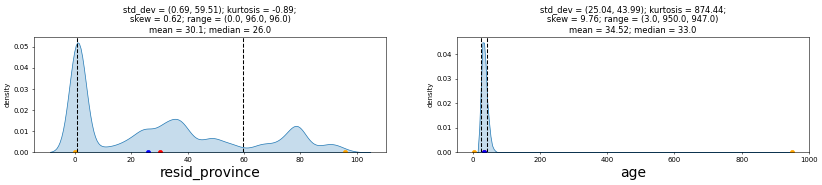

In [200]:
UVA_numeric(data, profile)

Cột age có 5 outliers vì có thể do có lỗi nhập liệu nên có những khách hàng sinh năm 1779, 1905, 1900, 1884, 1073. Chúng ta sẽ sửa 1778, 1884, 1073 thành 1979, 1984, 1973. Năm 1905, 1900 thay bằng năm phổ biến nhất. 

In [201]:
outliers_to_replace = [1779, 1884, 1073]
replace_values = {1779: 1979, 1884: 1984, 1073: 1973} 
common_year = data['birth_incorp_date'].mode()[0]
data['birth_incorp_date'].replace(to_replace=replace_values, inplace=True)
data['birth_incorp_date'].replace(to_replace=[1905, 1900], value=common_year, inplace=True)
current_year = datetime.now().year
data['age'] = current_year - data['birth_incorp_date']

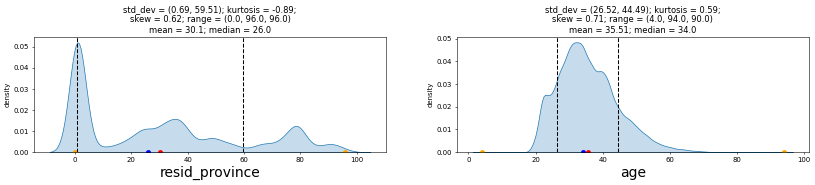

In [202]:
UVA_numeric(data, profile)

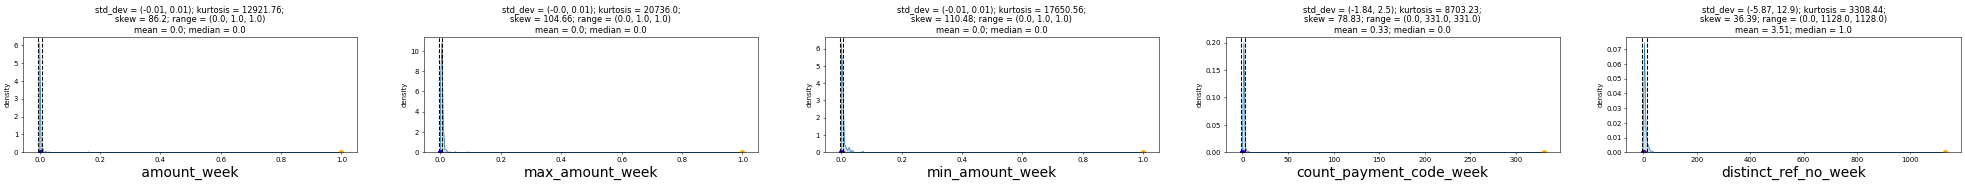

In [203]:
UVA_numeric(data, trans_week)

Xem xét giá trị độ nhọn (kurtosis) và độ lệch (skew) của cả 5 ô này, có thể thấy rõ outliers.
Như vậy, cần loại bỏ các outlier này:

In [204]:
factor = 2
week_data = data[trans_week]

# filtering using standard deviation (not considering obseravtions > mean + 3* standard deviation)
week_data = week_data[week_data[' amount_week '] < week_data[' amount_week '].mean() + factor*week_data[' amount_week '].std()]
week_data = week_data[week_data['max_amount_week'] < week_data['max_amount_week'].mean() + factor*week_data['max_amount_week'].std()]
week_data = week_data[week_data['min_amount_week'] < week_data['min_amount_week'].mean() + factor*week_data['min_amount_week'].std()]
week_data = week_data[week_data['count_payment_code_week'] < week_data['count_payment_code_week'].mean() + factor*week_data['count_payment_code_week'].std()]
week_data = week_data[week_data['distinct_ref_no_week'] < week_data['distinct_ref_no_week'].mean() + factor*week_data['distinct_ref_no_week'].std()]

# checking how many points removed
len(data), len(week_data)

(100000, 49541)

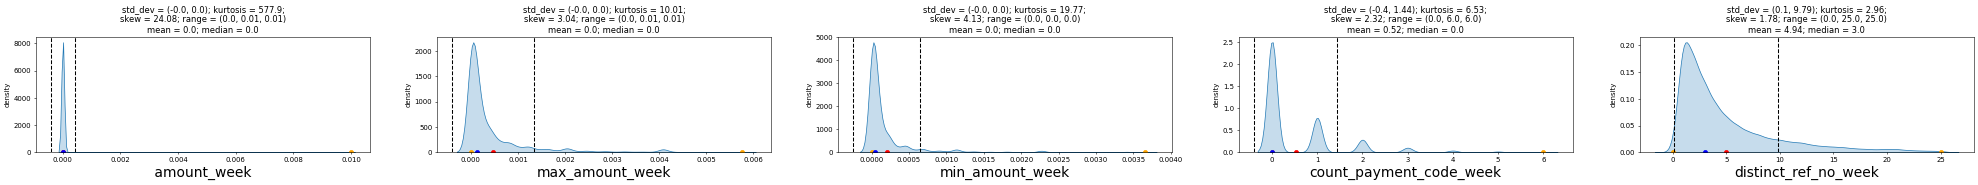

In [205]:
# sau khi remove outliers
UVA_numeric(week_data, trans_week)

Sau khi loại bỏ outliers theo standard distribution, các biểu đồ vẫn bị lệch khá nhiều. 

Ngoài ra, cột amount_week cần loại bỏ vì lỗi nhập liệu.

Câu hỏi đặt ra là, có điểm chung nào giữa các khách hàng thực hiện giao dịch không?

Có điểm chung nào giữa các outlier không? Những outliers này có thực hiện giao dịch thường xuyên không?

In [206]:
#drop cột amount_week
data = data.drop(' amount_week ', axis=1)

Phân tích tương tự với các cột month, 3month

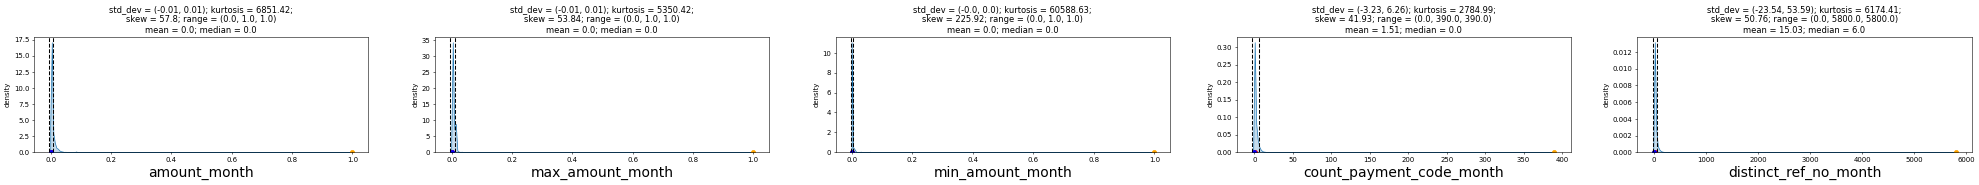

In [207]:
UVA_numeric(data, trans_month)

In [208]:
factor = 2
month_data = data[trans_month]

# filtering using standard deviation (not considering obseravtions > mean + 3* standard deviation)
month_data = month_data[month_data['amount_month'] < month_data['amount_month'].mean() + factor*month_data['amount_month'].std()]
month_data = month_data[month_data['max_amount_month'] < month_data['max_amount_month'].mean() + factor*month_data['max_amount_month'].std()]
month_data = month_data[month_data['min_amount_month'] < month_data['min_amount_month'].mean() + factor*month_data['min_amount_month'].std()]
month_data = month_data[month_data['count_payment_code_month'] < month_data['count_payment_code_month'].mean() + factor*month_data['count_payment_code_month'].std()]
month_data = month_data[month_data['distinct_ref_no_month'] < month_data['distinct_ref_no_month'].mean() + factor*month_data['distinct_ref_no_month'].std()]

# checking how many points removed
len(data), len(month_data)

(100000, 90123)

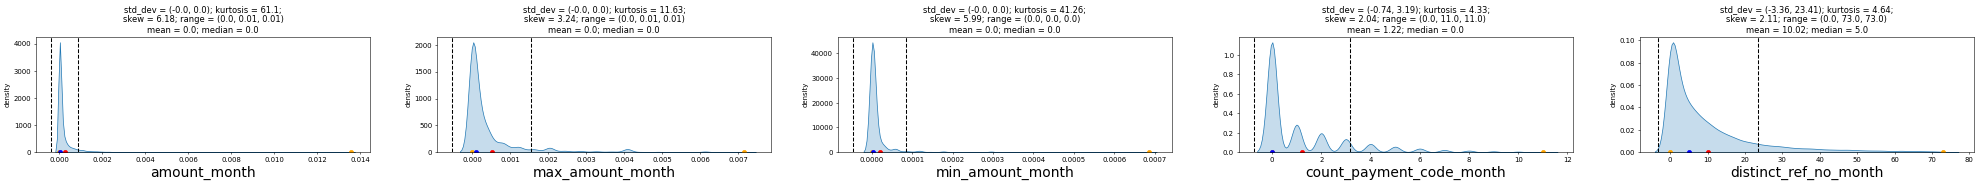

In [209]:
# sau khi remove outliers
UVA_numeric(month_data, trans_month)

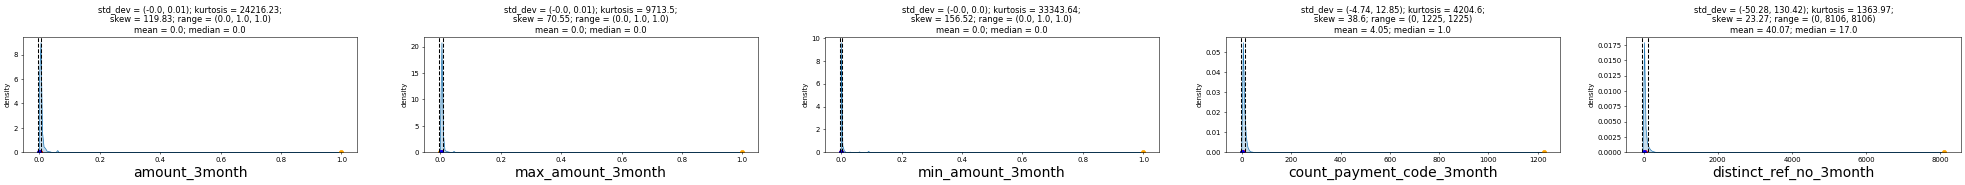

In [210]:
UVA_numeric(data, trans_3month)

In [211]:
factor = 2
month3_data = data[trans_3month]

# filtering using standard deviation (not considering obseravtions > mean + 3* standard deviation)
month3_data = month3_data[month3_data['amount_3month'] < month3_data['amount_3month'].mean() + factor*month3_data['amount_3month'].std()]
month3_data = month3_data[month3_data['max_amount_3month'] < month3_data['max_amount_3month'].mean() + factor*month3_data['max_amount_3month'].std()]
month3_data = month3_data[month3_data['min_amount_3month'] < month3_data['min_amount_3month'].mean() + factor*month3_data['min_amount_3month'].std()]
month3_data = month3_data[month3_data['count_payment_code_3month'] < month3_data['count_payment_code_3month'].mean() + factor*month3_data['count_payment_code_3month'].std()]
month3_data = month3_data[month3_data['distinct_ref_no_3month'] < month3_data['distinct_ref_no_3month'].mean() + factor*month3_data['distinct_ref_no_3month'].std()]

# checking how many points removed
len(data), len(month3_data)

(100000, 90797)

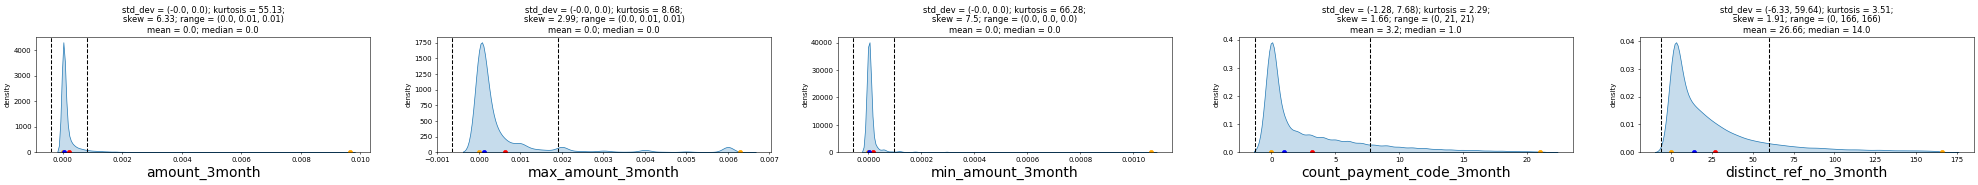

In [212]:
UVA_numeric(month3_data, trans_3month)

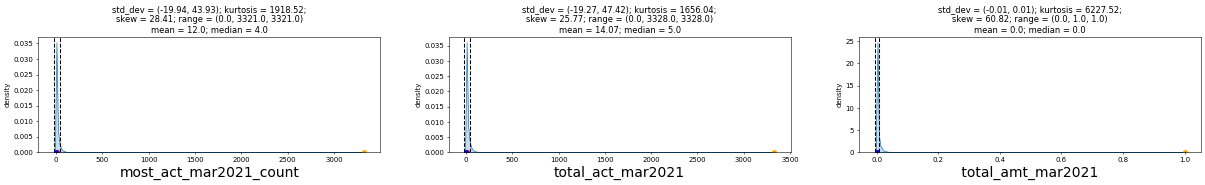

In [213]:
UVA_numeric(data, trans_mar)

In [214]:
factor = 2
mar_data = data[trans_mar]

# filtering using standard deviation (not considering obseravtions > mean + 3* standard deviation)
mar_data = mar_data[mar_data['most_act_mar2021_count'] < mar_data['most_act_mar2021_count'].mean() + factor*mar_data['most_act_mar2021_count'].std()]
mar_data = mar_data[mar_data['total_act_mar2021'] < mar_data['total_act_mar2021'].mean() + factor*mar_data['total_act_mar2021'].std()]
mar_data = mar_data[mar_data[' total_amt_mar2021 '] < mar_data[' total_amt_mar2021 '].mean() + factor*mar_data[' total_amt_mar2021 '].std()]

# checking how many points removed
len(data), len(mar_data)

(100000, 90526)

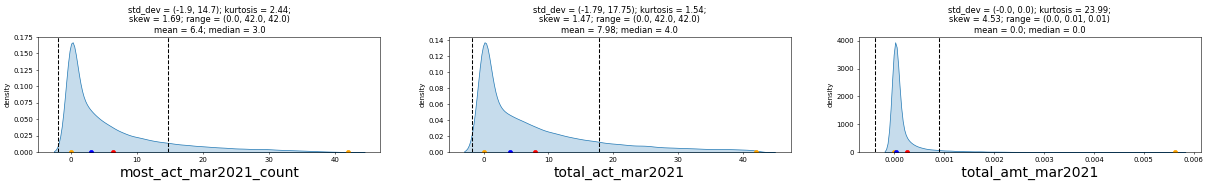

In [215]:
UVA_numeric(mar_data, trans_mar)

In [216]:
factor = 2
jun_data = data[trans_jun]

# filtering using standard deviation (not considering obseravtions > mean + 3* standard deviation)
jun_data = jun_data[jun_data['most_act_juin2021_count'] < jun_data['most_act_juin2021_count'].mean() + factor*jun_data['most_act_juin2021_count'].std()]
jun_data = jun_data[jun_data['total_act_juin2021'] < jun_data['total_act_juin2021'].mean() + factor*jun_data['total_act_juin2021'].std()]
jun_data = jun_data[jun_data['total_amt_juin2021'] < jun_data['total_amt_juin2021'].mean() + factor*jun_data['total_amt_juin2021'].std()]

# checking how many points removed
len(data), len(jun_data)

(100000, 90460)

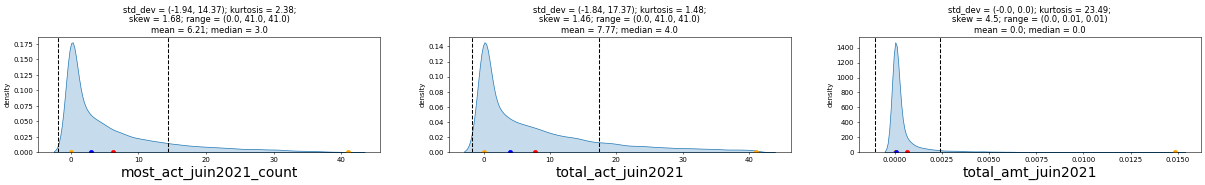

In [217]:
UVA_numeric(jun_data, trans_jun)

### 1.2. Categorical Values

In [218]:
# categorical datatypes
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

local_ref_1                     category
vn_marital_status               category
distinct_payment_code_week      category
distinct_trans_group_week       category
distinct_payment_code_month     category
distinct_trans_group_month      category
distinct_payment_code_3month    category
distinct_trans_group_3month     category
most_act_mar2021                category
most_act_juin2021               category
nhomno_xhtdJuin2021             category
churn                           category
dtype: object

In [219]:
def UVA_category(data, var_group):
    size = len(var_group)
    plt.figure(figsize=(10 * size, 5), dpi=100)

    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

        plt.subplot(1, size, j + 1)
        ax = sns.barplot(x=norm_count, y=norm_count.index)
        plt.xlabel('fraction/percent', fontsize=10)
        plt.ylabel('{}'.format(i), fontsize=10)
        plt.title('n_uniques = {} \n value counts \n {}'.format(n_uni, norm_count))

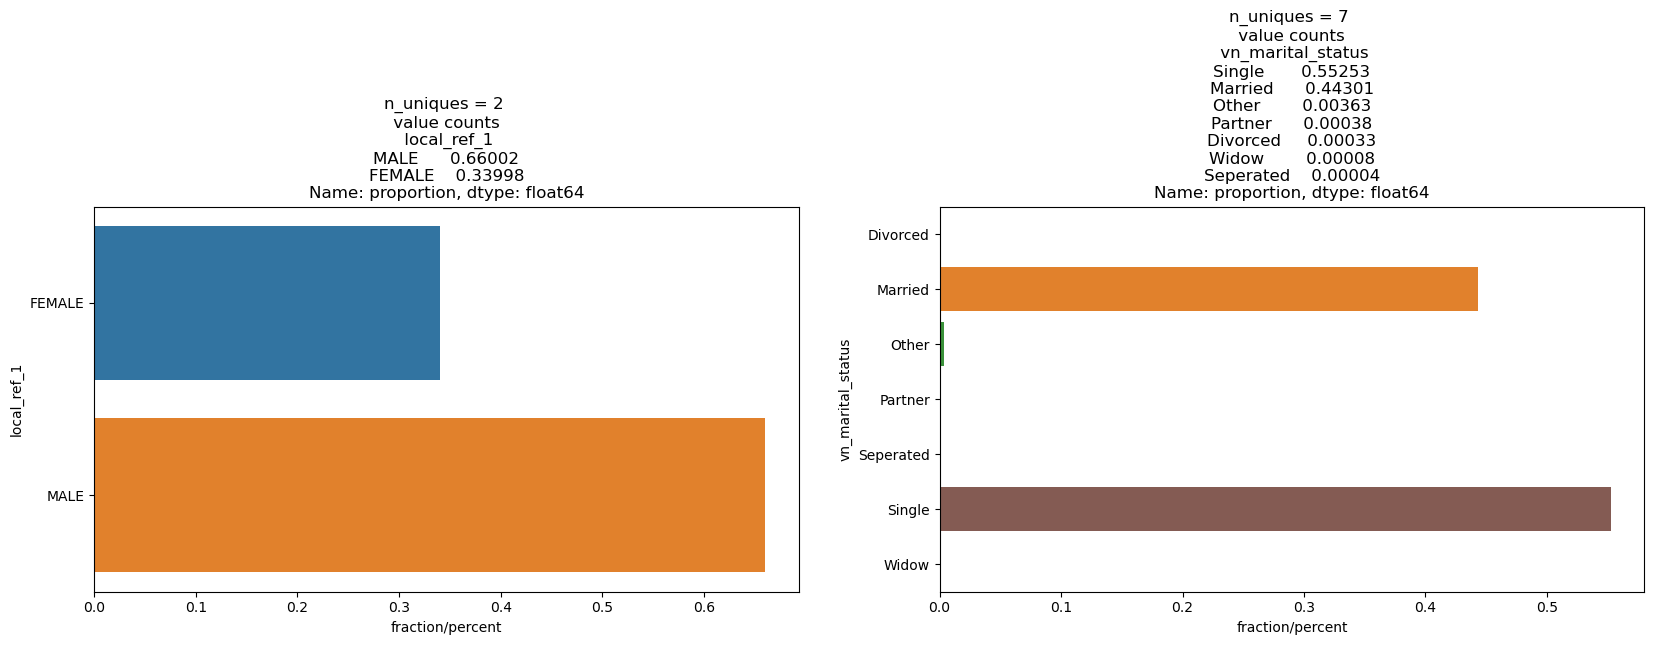

In [220]:
UVA_category(data, ['local_ref_1', 'vn_marital_status'])

Phần lớn khách hàng trong tập dữ liệu là nam giới (66%). 
2 tình trạng hôn nhân phổ biến nhất là Married và Single. Ta có thể gộp lại Single và các tình trạng khác vào nhãn "Not Married".

In [221]:
marital_mapping = {
    'Divorced': 'not married',
    'Partner': 'not married',
    'Seperated': 'not married',
    'Other': 'not married',
    'Widow': 'not married',
    'Single': 'not married'
}

data['vn_marital_status'].replace(marital_mapping, inplace=True)

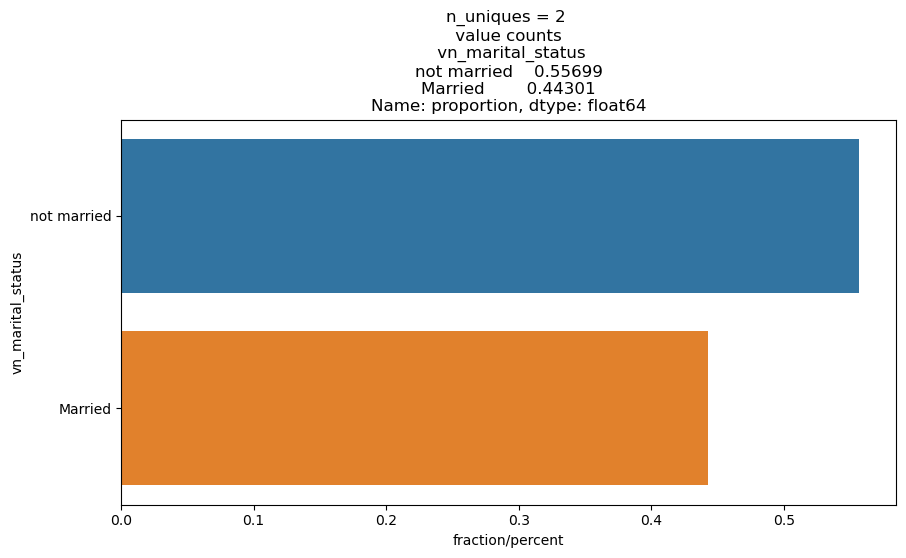

In [222]:
UVA_category(data, ['vn_marital_status'])

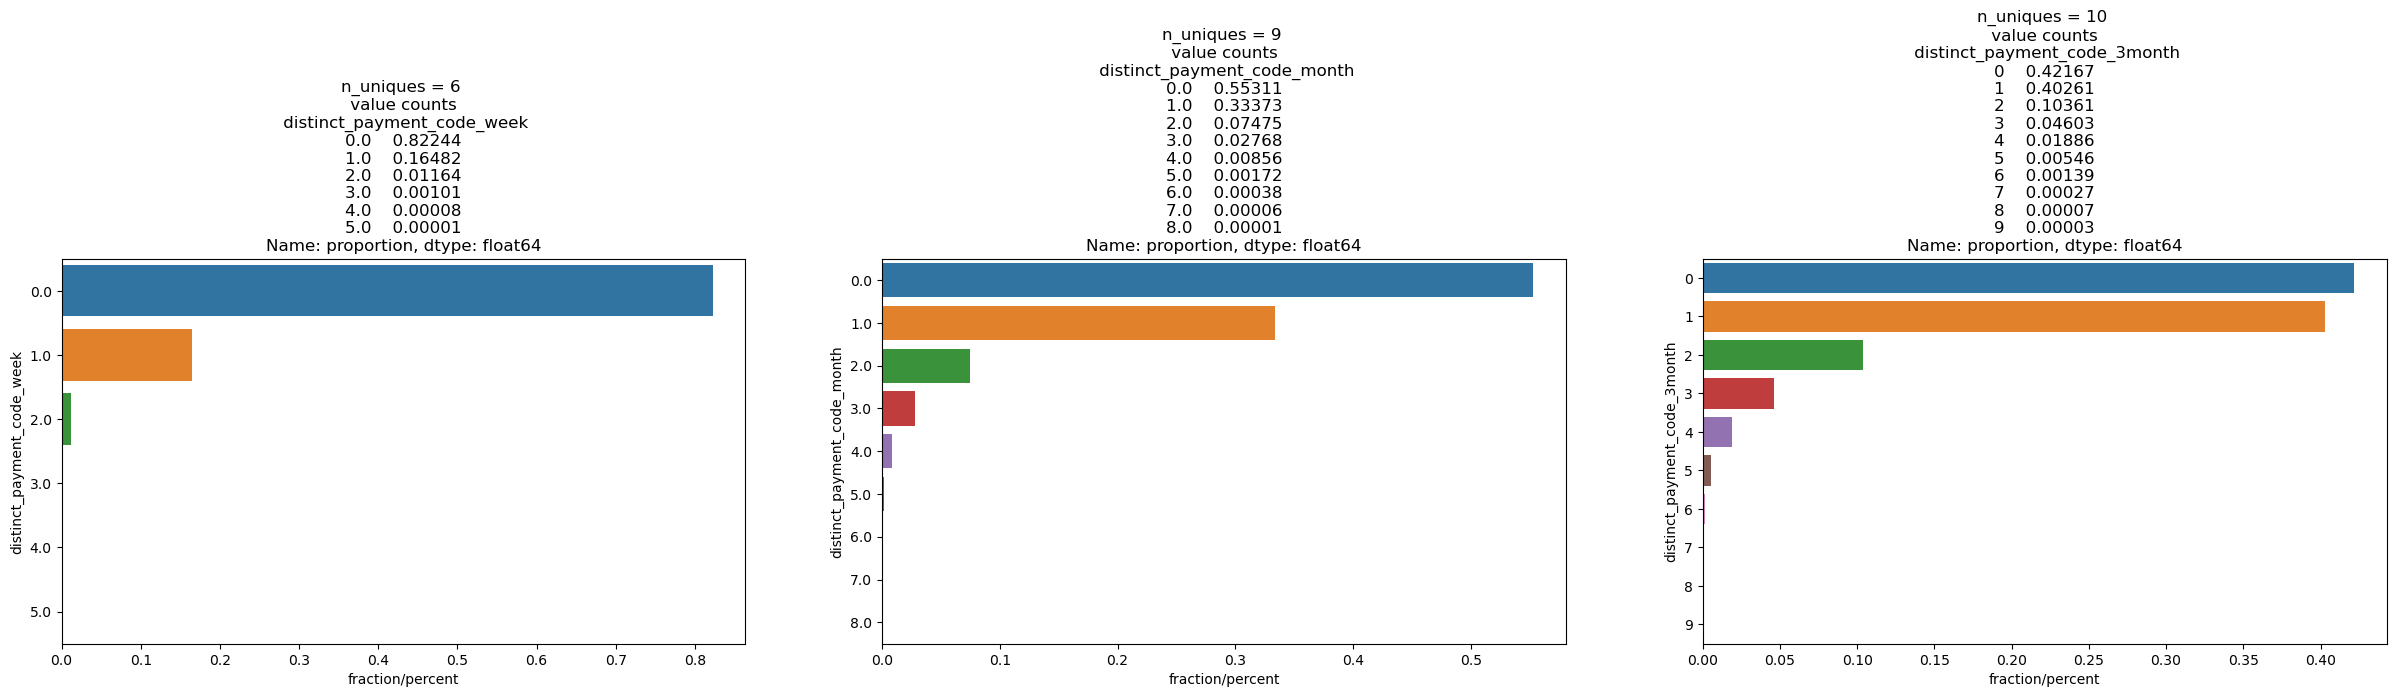

In [223]:
UVA_category(data, ['distinct_payment_code_week', 'distinct_payment_code_month', 'distinct_payment_code_3month'])

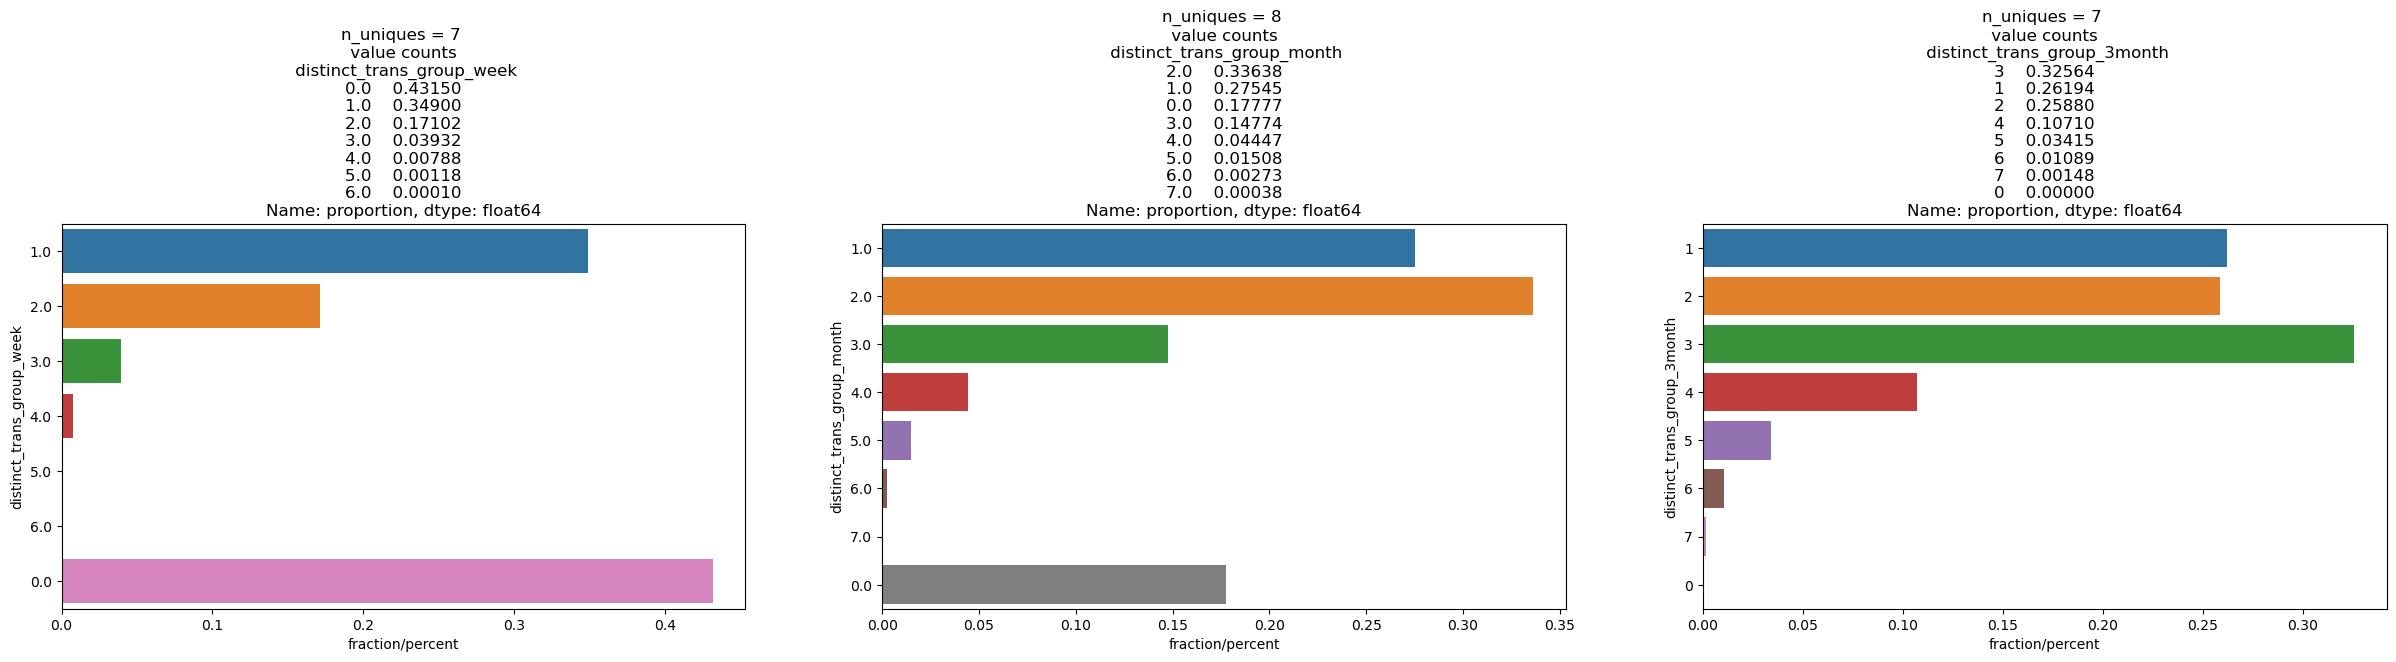

In [224]:
UVA_category(data, ['distinct_trans_group_week', 'distinct_trans_group_month', 'distinct_trans_group_3month'])

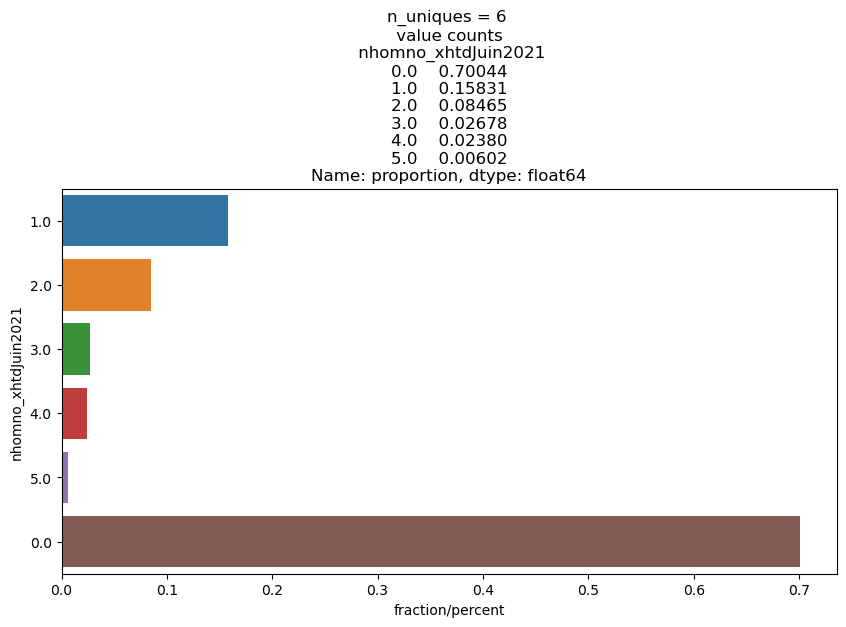

In [225]:
UVA_category(data, ['nhomno_xhtdJuin2021'])

Để đơn giản hóa phân tích, chia nhóm nợ thành nợ (1) và không nợ (0). Ta sẽ gộp hết dữ liệu các nhóm nợ vào category "1".

In [226]:
data['nhomno_xhtdJuin2021'].replace({2: 1, 3: 1, 4: 1, 5: 1}, inplace=True)

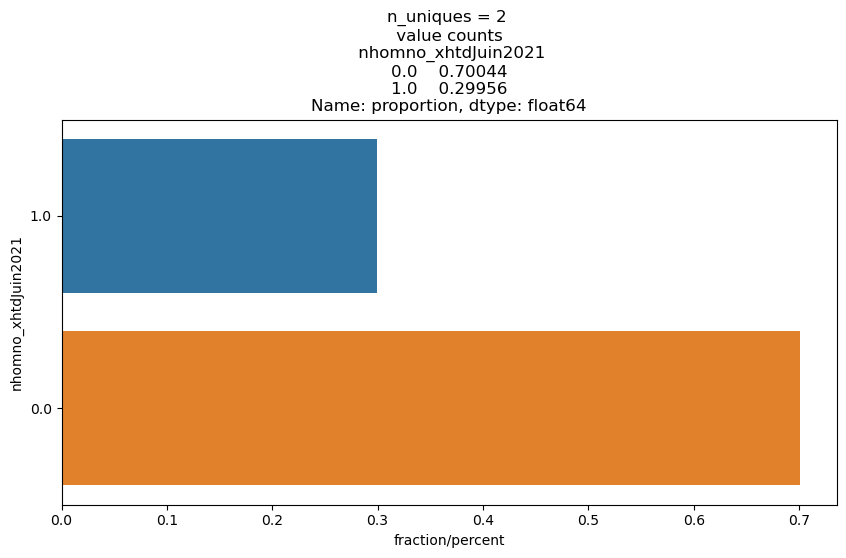

In [227]:
UVA_category(data, ['nhomno_xhtdJuin2021'])

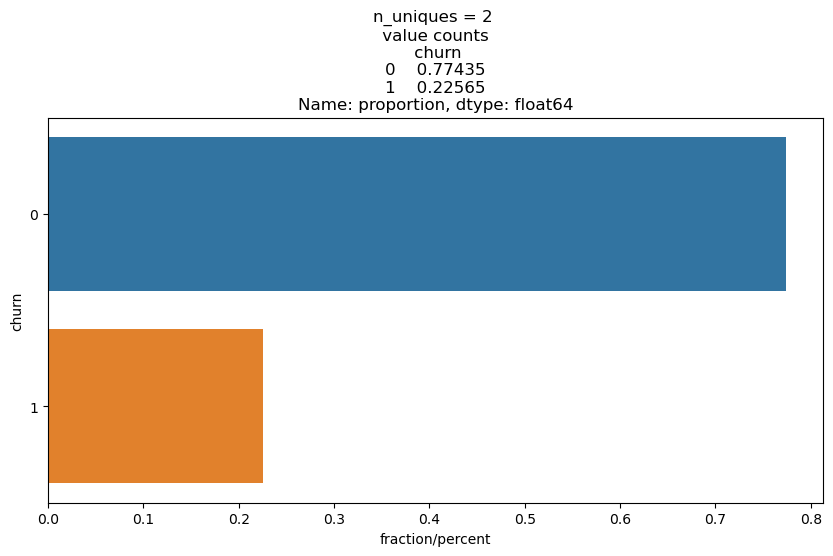

In [228]:
UVA_category(data, ['churn'])

## 2. Phân tích bivariate

In [229]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # Chỉ lấy các cột có kiểu dữ liệu numerical

# Tạo bảng tương quan (correlation matrix)
correlation_matrix = numerical_data.corr()
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > 0.5) & (correlation_matrix.abs() < 1)]

# Chuyển ma trận thành danh sách các cặp biến có correlation lớn hơn 0.5
high_corr_pairs = high_corr_pairs.unstack().drop_duplicates().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Lọc ra các cặp có correlation lớn hơn 0.5
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > 0.5]

# In các cặp có correlation lớn hơn 0.5
print(high_corr_pairs)

                  Variable 1                 Variable 2  Correlation
1            max_amount_week               amount_month     0.663101
2            max_amount_week           max_amount_month     0.657631
3            max_amount_week              amount_3month     0.708997
4            max_amount_week          max_amount_3month     0.640419
5    count_payment_code_week   count_payment_code_month     0.813747
6    count_payment_code_week  count_payment_code_3month     0.680768
7       distinct_ref_no_week      distinct_ref_no_month     0.887983
8       distinct_ref_no_week     distinct_ref_no_3month     0.748698
9       distinct_ref_no_week     most_act_mar2021_count     0.598631
10      distinct_ref_no_week          total_act_mar2021     0.608063
11      distinct_ref_no_week    most_act_juin2021_count     0.543420
12      distinct_ref_no_week         total_act_juin2021     0.551933
13              amount_month           max_amount_month     0.653682
14              amount_month      

In [230]:
data.columns

Index(['local_ref_1', 'vn_marital_status', 'resid_province',
       'birth_incorp_date', 'max_amount_week', 'min_amount_week',
       'distinct_payment_code_week', 'count_payment_code_week',
       'distinct_trans_group_week', 'distinct_ref_no_week', 'amount_month',
       'max_amount_month', 'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'most_act_mar2021',
       'total_act_mar2021', ' total_amt_mar2021 ', 'most_act_juin2021_count',
       'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021',
       'rd_id', 'nhomno_xhtdJuin2021', 'age', 'churn'],
      dtype='object')

In [231]:
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]

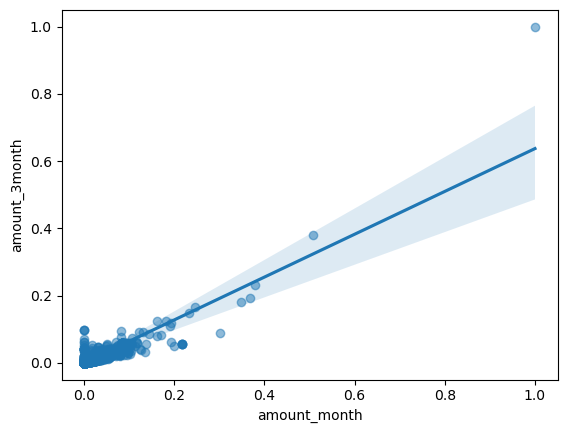

In [232]:
sns.regplot(x='amount_month', y='amount_3month', data=data, scatter_kws={'alpha':0.5})
plt.show()

Có thể thấy, tổng giao dịch trong 1 tháng và 3 tháng trước có mối quan hệ tuyến tính khá mạnh. Khi lựa chọn feature cho model có thể chọn 1 trong 2.

In [233]:
data.columns

Index(['local_ref_1', 'vn_marital_status', 'resid_province',
       'birth_incorp_date', 'max_amount_week', 'min_amount_week',
       'distinct_payment_code_week', 'count_payment_code_week',
       'distinct_trans_group_week', 'distinct_ref_no_week', 'amount_month',
       'max_amount_month', 'min_amount_month', 'distinct_payment_code_month',
       'count_payment_code_month', 'distinct_trans_group_month',
       'distinct_ref_no_month', 'amount_3month', 'max_amount_3month',
       'min_amount_3month', 'distinct_payment_code_3month',
       'count_payment_code_3month', 'distinct_trans_group_3month',
       'distinct_ref_no_3month', 'most_act_mar2021_count', 'most_act_mar2021',
       'total_act_mar2021', ' total_amt_mar2021 ', 'most_act_juin2021_count',
       'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021',
       'rd_id', 'nhomno_xhtdJuin2021', 'age', 'churn'],
      dtype='object')

In [234]:
from scipy.stats import zscore
age_data = data['age']
z_scores = zscore(age_data)
threshold = 3

# Tạo mask để chọn các giá trị không phải là outlier
mask = (abs(z_scores) < threshold)

# Tạo DataFrame mới chỉ chứa các dòng không chứa outlier
age_without_outliers = data[mask]

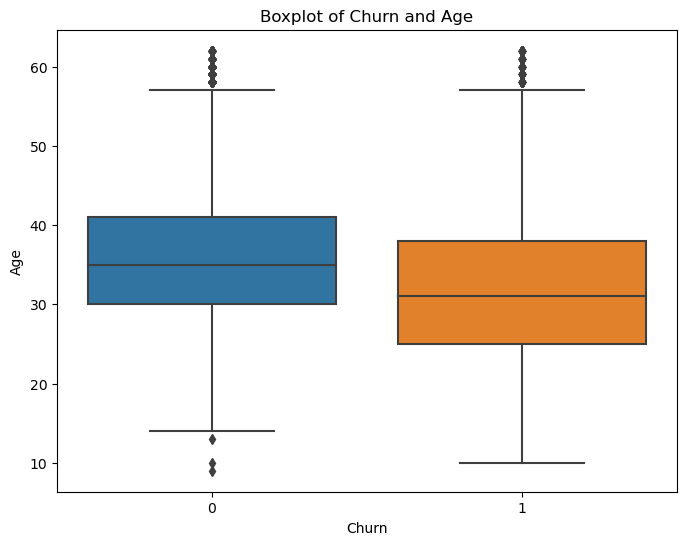

In [235]:
selected_columns = ['churn', 'age']

# Tạo DataFrame mới từ các cột được chọn
selected_data = age_without_outliers[selected_columns]

# Vẽ boxplot
plt.figure(figsize=(8, 6))  # Kích thước của biểu đồ
sns.boxplot(x='churn', y='age', data=selected_data)
plt.title('Boxplot of Churn and Age')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

Tỷ lệ churn ở người trẻ tuổi cao hơn.

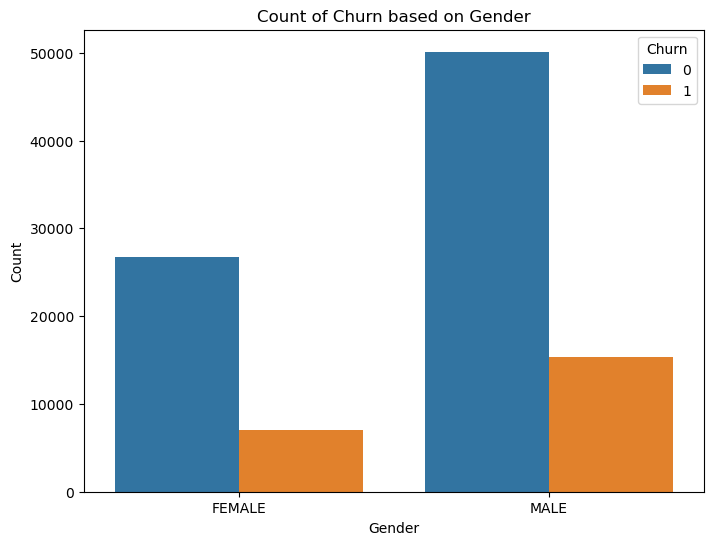

In [236]:
selected_columns_2 = ['churn', 'local_ref_1']

# Tạo DataFrame mới từ các cột được chọn
selected_data_2 = age_without_outliers[selected_columns_2]

# Vẽ countplot hoặc barplot
plt.figure(figsize=(8, 6))  # Kích thước của biểu đồ
sns.countplot(x='local_ref_1', hue='churn', data=selected_data_2)
plt.title('Count of Churn based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')  # Thêm chú thích
plt.show()

In [237]:
total_male = (data['local_ref_1'] == 'MALE').sum()
total_female = (data['local_ref_1'] == 'FEMALE').sum()

churn_male = (data[(data['local_ref_1'] == 'MALE') & (data['churn'] == 1)]['churn'].count() / total_male) * 100
churn_female = (data[(data['local_ref_1'] == 'FEMALE') & (data['churn'] == 1)]['churn'].count() / total_female) * 100

print(f"Tỷ lệ phần trăm nam churn: {churn_male:.2f}%")
print(f"Tỷ lệ phần trăm nữ churn: {churn_female:.2f}%")

Tỷ lệ phần trăm nam churn: 23.48%
Tỷ lệ phần trăm nữ churn: 20.78%


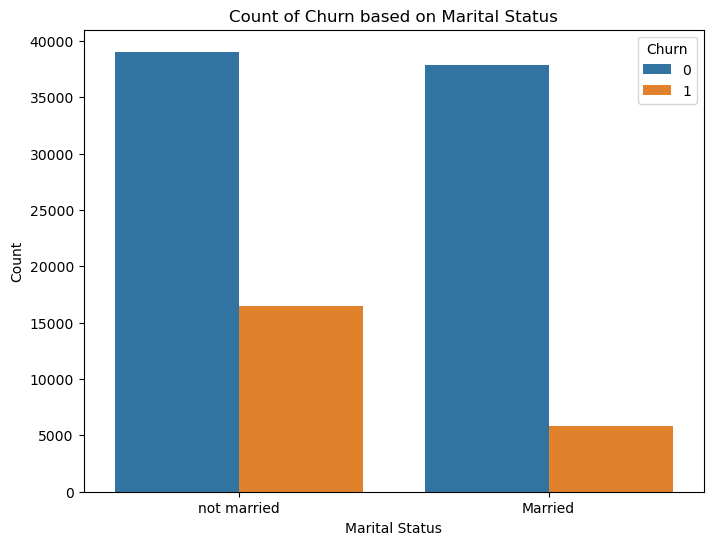

In [238]:
selected_columns_2 = ['churn', 'vn_marital_status']

# Tạo DataFrame mới từ các cột được chọn
selected_data_2 = age_without_outliers[selected_columns_2]

# Vẽ countplot hoặc barplot
plt.figure(figsize=(8, 6))  # Kích thước của biểu đồ
sns.countplot(x='vn_marital_status', hue='churn', data=selected_data_2)
plt.title('Count of Churn based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

Tỷ lệ churn của nhóm khách hàng đã kết hôn cao hơn hẳn

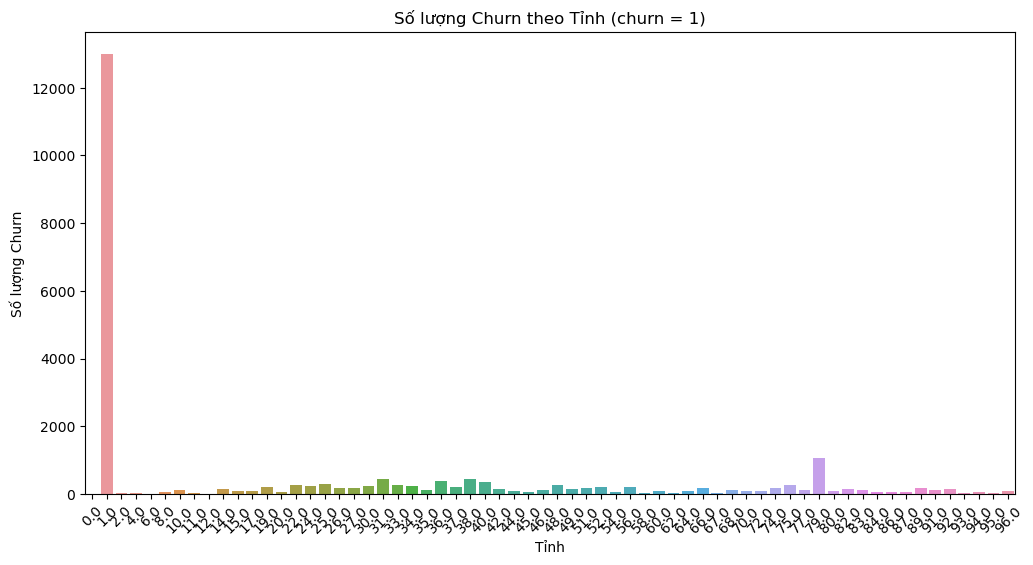

In [239]:
# Lọc dữ liệu chỉ chứa các dòng có 'churn' = 1
filtered_data = data[data['churn'] == 1]

# Tính tỷ lệ churn theo từng tỉnh
churn_by_province = filtered_data.groupby('resid_province').size().reset_index(name='count')

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))  # Kích thước biểu đồ
sns.barplot(x='resid_province', y='count', data=churn_by_province)
plt.title('Số lượng Churn theo Tỉnh (churn = 1)')
plt.xlabel('Tỉnh')
plt.ylabel('Số lượng Churn')
plt.xticks(rotation=45)
plt.show()

Tỉnh có mã số 1 và 77 có số lượng churn cao.

# <span style="color: blue"> Part 3: Model development

#### Drop các cột không dùng để dự đoán

In [240]:
data.drop('resid_province', axis=1, inplace=True)
data.drop('birth_incorp_date', axis=1, inplace=True)

In [241]:
data.drop('rd_id', axis=1, inplace=True)

Dựa vào correlation, loại bỏ feature nào có tương quan với nhau (chỉ giữ lại 1 feature)

In [242]:
cor_drop= ['max_amount_week', 'min_amount_week', 'distinct_payment_code_week', 'count_payment_code_week', 'distinct_trans_group_week','distinct_ref_no_week',
          'max_amount_month', 'min_amount_month', 'max_amount_3month', 'min_amount_3month',
          'most_act_juin2021_count', 'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021', 'amount_month' ]
data.drop(cor_drop, axis=1, inplace=True)

#### One hot encoding

In [243]:
df_encoded = data.copy()
df_encoded.head()

,local_ref_1,vn_marital_status,distinct_payment_code_month,count_payment_code_month,distinct_trans_group_month,distinct_ref_no_month,amount_3month,distinct_payment_code_3month,count_payment_code_3month,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,nhomno_xhtdJuin2021,age,churn
0,MALE,Married,0.0,0.0,2.0,12.0,0.000073,0,0,2,33,5.0,Giao dich chuyen khoan,5.0,0.000016,0.0,32.0,0
1,MALE,not married,0.0,0.0,1.0,1.0,0.000014,0,0,2,5,0.0,0,0.0,0.000000,1.0,38.0,0
2,MALE,Married,0.0,0.0,1.0,2.0,0.000016,2,3,2,7,4.0,Giao dich chuyen khoan,6.0,0.000046,0.0,44.0,0
3,MALE,not married,0.0,0.0,0.0,0.0,0.000000,0,0,1,1,0.0,0,0.0,0.000000,0.0,23.0,1
4,MALE,Married,1.0,5.0,3.0,12.0,0.000074,1,11,3,24,9.0,Giao dich chuyen khoan,10.0,0.000170,0.0,35.0,0


In [244]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

In [245]:
df_encoded.head(10)

,count_payment_code_month,distinct_ref_no_month,amount_3month,count_payment_code_3month,distinct_ref_no_3month,most_act_mar2021_count,total_act_mar2021,total_amt_mar2021,age,local_ref_1_MALE,...,distinct_trans_group_3month_7,distinct_trans_group_3month_0,most_act_mar2021_GIAO DICH RUT TIEN ATM,most_act_mar2021_GIAO DICH THANH TOAN,most_act_mar2021_GIAO DICH TIET KIEM,most_act_mar2021_Giao dich chuyen khoan,most_act_mar2021_Giao dich thanh toan,most_act_mar2021_0,nhomno_xhtdJuin2021_0.0,churn_1
0,0.0,12.0,7.350000e-05,0,33,5.0,5.0,0.000016,32.0,True,...,False,False,False,False,False,True,False,False,True,False
1,0.0,1.0,1.380000e-05,0,5,0.0,0.0,0.000000,38.0,True,...,False,False,False,False,False,False,False,True,False,False
2,0.0,2.0,1.570000e-05,3,7,4.0,6.0,0.000046,44.0,True,...,False,False,False,False,False,True,False,False,True,False
3,0.0,0.0,0.000000e+00,0,1,0.0,0.0,0.000000,23.0,True,...,False,False,False,False,False,False,False,True,True,True
4,5.0,12.0,7.450000e-05,11,24,9.0,10.0,0.000170,35.0,True,...,False,False,False,False,False,True,False,False,True,False
5,4.0,4.0,1.310000e-07,5,5,1.0,2.0,0.000002,31.0,True,...,False,False,False,False,False,False,False,False,True,False
6,0.0,0.0,0.000000e+00,0,2,0.0,0.0,0.000000,30.0,True,...,False,False,False,False,False,False,False,True,True,True
7,0.0,48.0,3.435940e-04,2,141,69.0,71.0,0.001015,32.0,True,...,False,False,False,False,False,True,False,False,False,False
8,0.0,0.0,5.000000e-07,3,4,0.0,0.0,0.000000,35.0,True,...,False,False,False,False,False,False,False,True,True,True
9,0.0,0.0,0.000000e+00,0,1,0.0,0.0,0.000000,24.0,False,...,False,False,False,False,False,False,False,True,True,True


#### Scaling the data

In [246]:
cat=[]
num=[]
for i in data.columns:
  if data[i].dtype=='category':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['local_ref_1', 'vn_marital_status', 'distinct_payment_code_month', 'distinct_trans_group_month', 'distinct_payment_code_3month', 'distinct_trans_group_3month', 'most_act_mar2021', 'nhomno_xhtdJuin2021', 'churn']
num =  ['count_payment_code_month', 'distinct_ref_no_month', 'amount_3month', 'count_payment_code_3month', 'distinct_ref_no_3month', 'most_act_mar2021_count', 'total_act_mar2021', ' total_amt_mar2021 ', 'age']


In [247]:
scaler = StandardScaler()

In [248]:
features = df_encoded[num]
features = scaler.fit_transform(features)

In [249]:
scaled_df_encoded = df_encoded.copy()

In [250]:
scaled_df_encoded[num] = features

In [251]:
scaled_df_encoded

,count_payment_code_month,distinct_ref_no_month,amount_3month,count_payment_code_3month,distinct_ref_no_3month,most_act_mar2021_count,total_act_mar2021,total_amt_mar2021,age,local_ref_1_MALE,...,distinct_trans_group_3month_7,distinct_trans_group_3month_0,most_act_mar2021_GIAO DICH RUT TIEN ATM,most_act_mar2021_GIAO DICH THANH TOAN,most_act_mar2021_GIAO DICH TIET KIEM,most_act_mar2021_Giao dich chuyen khoan,most_act_mar2021_Giao dich thanh toan,most_act_mar2021_0,nhomno_xhtdJuin2021_0.0,churn_1
0,-0.318472,-0.078460,-0.112449,-0.460718,-0.078235,-0.219153,-0.272079,-0.125567,-0.390248,True,...,False,False,False,False,False,True,False,False,True,False
1,-0.318472,-0.363702,-0.125603,-0.460718,-0.388140,-0.375727,-0.422026,-0.127629,0.277712,True,...,False,False,False,False,False,False,False,True,False,False
2,-0.318472,-0.337771,-0.125185,-0.119586,-0.366004,-0.250468,-0.242089,-0.121774,0.945672,True,...,False,False,False,False,False,True,False,False,True,False
3,-0.318472,-0.389633,-0.128644,-0.460718,-0.432412,-0.375727,-0.422026,-0.127629,-1.392188,True,...,False,False,False,False,False,False,False,True,True,True
4,0.735458,-0.078460,-0.112228,0.790098,-0.177848,-0.093894,-0.122132,-0.105908,-0.056268,True,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.318472,-0.389633,-0.128644,-0.460718,-0.421344,0.125310,0.117783,-0.113837,-0.390248,False,...,False,False,False,False,False,True,False,False,True,False
99996,-0.318472,-0.363702,-0.128644,-0.460718,-0.432412,-0.375727,-0.422026,-0.127629,-1.392188,True,...,False,False,False,False,False,False,False,True,True,False
99997,-0.318472,-0.337771,-0.126022,-0.460718,-0.399208,-0.219153,-0.152121,-0.071874,0.166386,False,...,False,False,False,False,False,True,False,False,True,False
99998,-0.318472,-0.389633,-0.128644,-0.460718,-0.432412,0.532403,0.657593,-0.116099,-1.503515,True,...,False,False,False,False,False,True,False,False,True,False


#### Logistics Model

##### Oversampling

Vì dữ liệu target (churn/ko churn) bị mất cân bằng, với hơn 20% churn. Nên chúng ta sẽ oversampling để dữ liệu cân bằng hơn.

In [252]:
from imblearn.over_sampling import RandomOverSampler

In [253]:
df_model = scaled_df_encoded.copy()

In [254]:
df_model.columns

Index(['count_payment_code_month', 'distinct_ref_no_month', 'amount_3month',
       'count_payment_code_3month', 'distinct_ref_no_3month',
       'most_act_mar2021_count', 'total_act_mar2021', ' total_amt_mar2021 ',
       'age', 'local_ref_1_MALE', 'vn_marital_status_Married',
       'distinct_payment_code_month_1.0', 'distinct_payment_code_month_2.0',
       'distinct_payment_code_month_3.0', 'distinct_payment_code_month_4.0',
       'distinct_payment_code_month_5.0', 'distinct_payment_code_month_6.0',
       'distinct_payment_code_month_7.0', 'distinct_payment_code_month_8.0',
       'distinct_trans_group_month_2.0', 'distinct_trans_group_month_3.0',
       'distinct_trans_group_month_4.0', 'distinct_trans_group_month_5.0',
       'distinct_trans_group_month_6.0', 'distinct_trans_group_month_7.0',
       'distinct_trans_group_month_0.0', 'distinct_payment_code_3month_1',
       'distinct_payment_code_3month_2', 'distinct_payment_code_3month_3',
       'distinct_payment_code_3month_4

In [255]:
X = df_model.drop('churn_1', axis=1)
y = df_model['churn_1']

In [256]:
ros = RandomOverSampler(random_state=0)

In [257]:
X_resampled, y_resampled = ros.fit_resample(X, y)

In [258]:
X.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996     True
99997     True
99998    False
99999    False
Length: 100000, dtype: bool

In [259]:
y_resampled.value_counts()

churn_1
False    77435
True     77435
Name: count, dtype: int64

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 103)

In [261]:
lr = LogisticRegression(penalty='l2')

In [262]:
lr.fit(X_resampled, y_resampled)

LogisticRegression()

In [263]:
print('Accuracy on training set: {:.3f}'.format(lr.score(X_train,y_train)))

Accuracy on training set: 0.937


In [264]:
y_pred = lr.predict(X_test)

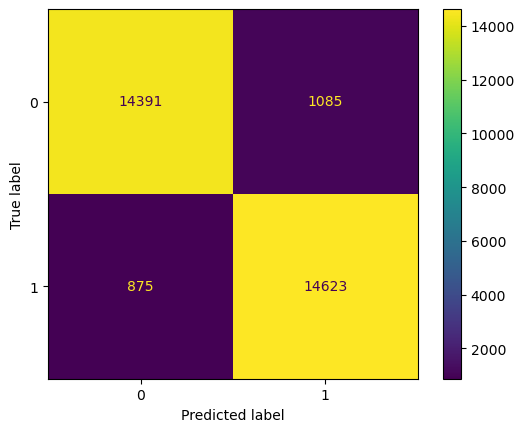

In [265]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [266]:
print('Accuracy_score of Logistic Regression classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision_score of Logistic Regression classifier: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall_score of Logistic Regression classifier: {:.3f}'.format(recall_score(y_test, y_pred)))

Accuracy_score of Logistic Regression classifier: 0.937
Precision_score of Logistic Regression classifier: 0.931
Recall_score of Logistic Regression classifier: 0.944


In [267]:
f1_score(y_test, y_pred)

0.9371915657245401

##### Regulate model sử dụng Ridge Classifier

Để tránh model bị overfit, chúng ta sẽ sử dụng Ridge Classifier để tìm ra các feature quan trọng.

In [268]:
def evaluate(model, metrics, X, y):
    y_hat = model.predict(X)
    for metric in metrics:
        print(f"{metric.__name__} = {metric(y_hat, y)}")

In [269]:
ridge = RidgeClassifier(alpha=1, max_iter=2000)

In [270]:
ridge.fit(X_train, y_train)

RidgeClassifier(alpha=1, max_iter=2000)

In [271]:
evaluate(ridge, [accuracy_score, f1_score], X_test, y_test)

accuracy_score = 0.9366888357977659
f1_score = 0.9370404854400103


In [272]:
coefficients = ridge.coef_
feature_names = df_model.columns[df_model.columns != 'churn_1']
coefficients_df = pd.DataFrame(ridge.coef_, columns = feature_names).transpose()
coefficients_df

,0
count_payment_code_month,0.023681
distinct_ref_no_month,-0.006190
amount_3month,-0.007404
count_payment_code_3month,-0.010454
distinct_ref_no_3month,0.017755
most_act_mar2021_count,0.167533
total_act_mar2021,-0.186648
total_amt_mar2021,0.007984
age,-0.015758
local_ref_1_MALE,0.010751
